# Employee Feedback Sentiment Analysis

## Understanding Employee Sentiment from Surveys and Reviews to Improve Employee Engagement and Productivity

## 1. Import packages

Here, we import all the Python packages we will be needing for this project.

In [5]:
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For data visualization
from wordcloud import WordCloud # For visualizing text/words

## 2. Understanding the data

Here, we aim to achieve a few things. These include:
- loading the dataset,
- we will also take a brief look at what each of the parameters or columns in our dataset represent,
- conducting some quick initial exploration of the data to understand its structure and columns.

The aim of all these is to understand the data we have.

We begin this section by loading the dataset into the Python environment with Pandas. The dataset was saved as 'Dataset.csv' locally.

In [7]:
df = pd.read_csv(r'C:\Users\USER\Desktop\HR Analytics\Dataset.csv')

Now that the dataset has been loaded into the Python environment, we will now see a quick overview of the dataset and what it contains. We will only be viewing the first five rows of the dataset.

In [9]:
df.head(20)

,ID,Comment_Positives,Comment_Negatives,Advice_To_Mgmt,Overall_Ratings,Work_Balance_Stars,Culture_Values_Stars,Career_Opportunities_Stars,Comp_Benefit_Stars,Senior_Management_Stars,Employee_Engagement_Activities,Employee_Tenure,Location,Feedback_Date,Career_Growth_Opportunities_Stars,Wellness_Programs_Satisfaction,Remote_Work_Satisfaction
0,1,People are smart and friendly,Bureaucracy is slowing things down,NaN,5,5,5,5,3,5,No,7,CityA,2023-01-16 23:32:22.717722,5,1,4
1,2,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,5,5,5,5,3,5,No,2,CityA,2023-04-03 23:32:22.717722,1,2,4
2,3,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,5,5,3,5,Yes,5,CityC,2023-06-25 23:32:22.717722,3,5,4
3,4,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,4,4,5,5,2,4,Yes,5,CityB,2023-08-04 23:32:22.717722,3,4,3
4,10,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,4,4,5,5,2,4,No,8,CityB,2023-03-31 23:32:22.717722,5,2,3
5,16,The people are great to work with,There is lower compensation than expected,NaN,5,5,5,5,3,5,Yes,6,CityC,2023-06-09 23:32:22.717722,4,4,4
6,17,"The people are great to work with, good perks.",Wide variety in experience based on team.,NaN,3,3,4,4,1,3,Yes,5,CityB,2023-01-04 23:32:22.717722,3,5,2
7,18,"Good managers, benefits , some support, nice a...","Long hours, far locations, a lot of work",NaN,5,5,5,5,3,5,No,1,CityB,2023-11-04 23:32:22.717722,1,2,4
8,19,Really fun work environment with startup,Really no down sides that I saw.,NaN,5,5,5,5,3,5,No,9,CityC,2022-12-08 23:32:22.717722,5,2,4
9,24,Awesome job environment to work in,Pressure is there for some parts,NaN,5,5,5,5,3,5,No,9,CityC,2023-11-04 23:32:22.717722,5,1,4


Now, that we have taken a look at the first few rows of the the dataset, we will now give a brief explanation of what each of the columns in the dataset represent, to help you better understand what you are looking at.

- `ID`: A unique identifier for each feedback entry.
- `Comment_Positives`: Positive comments or feedback from the employees.
- `Comment_Negatives`: Negative comments or feedback from the employees.
- `Advice_to_Mgmt`: Advice or suggestions from the employees directed towards management.
- `Overall_Ratings`: Employee's overall rating of the company on a scale from 1 to 5.
- `Work_Balance_Stars`: Employee's feedback on work-life balance on a scale from 1 to 5.
- `Culture_Values_Stars`: Employee's feedback on company culture on a scale from 1 to 5.
- `Career_Opportunities_Stars`: Employee's feedback on career opportunities within the company on a scale from 1 to 5.
- `Comp_Benefit_Stars`: Employee's feedback on company compensation and benefits on a scale from 1 to 5.
- `Senior_Management_Stars`: Employee's feedback on the company's senior management on a scale from 1 to 5.
- `Employee_Engagement_Activities`: Whether the employee participates in employee engagement activities (Yes/No). Engagement activities could include team-building exercises, training programs, recognition programs, social events, all aimed at enhancing employees' job satisfaction, motivation and overall well-being.
- `Employee_Tenure`: The number of years an employee has been with the company.
- `Location`: The location of the employee within the company (e.g., CityA, CityB, CityC).
- `Feedback_Date`: The date when the employee provided feedback.
- `Career_Growth_Opportunities_Stars`: Employee's feedback on career growth opportunities on a scale influenced by their tenure.
- `Wellness_Programs_Satisfaction`: Employee's satisfaction with wellness programs, influenced by their engagement in such programs.
- `Remote_Work_Satisfaction`: Employee's satisfaction with remote work arrangements, influenced by their satisfaction with work-life balance and overall ratings.

The last thing we will do here, will be to get simple statistical properties of the dataset. This is to help us understand the range of values, standard deviation, mean of the parameters in our data.

In [ ]:
df.describe()

,ID,Overall_Ratings,Work_Balance_Stars,Culture_Values_Stars,Career_Opportunities_Stars,Comp_Benefit_Stars,Senior_Management_Stars,Employee_Tenure,Career_Growth_Opportunities_Stars,Wellness_Programs_Satisfaction,Remote_Work_Satisfaction
count,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000
mean,33998.602716,3.588179,3.588179,4.391218,4.391218,1.746242,3.588179,5.493671,3.192181,3.251187,2.609012
std,19506.284643,0.996981,0.996981,0.771997,0.771997,0.763744,0.996981,2.885124,1.722801,1.423715,0.952117
min,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,17198.750000,3.000000,3.000000,4.000000,4.000000,1.000000,3.000000,3.000000,1.000000,2.000000,2.000000
50%,34121.500000,4.000000,4.000000,5.000000,5.000000,2.000000,4.000000,5.000000,3.000000,4.000000,3.000000
75%,50907.500000,4.000000,4.000000,5.000000,5.000000,2.000000,4.000000,8.000000,5.000000,5.000000,3.000000
max,67528.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,10.000000,5.000000,5.000000,4.000000


Here's what each value here represents:
- `count`: Since the count is the same for all the columns listed here, it once again confirms that we do not have any missing values in these columns. The count only indicates the non-null/non-missing values of each column.
- `mean`: Gives the average value in each column.
- `std`: This is the standard deviation of the values in the column.
- `min`: This is the minimum value in each column.
- `25%`: The 25th percentile of each column.
- `50%`: This is the median value ofo each column.
- `75%`: This is the 75th percentile of each column.
- `max`: The maximum value in each column.

Note that all of the ratings range between 1.0 and 5.0, except for `Culture_Values_Stars` and `Career_Opportunities_Stars` which both range from 2.0 to 5.0.

## 3. Data Preprocessing

In this section, we will focus on checking and fixing two things.
- **Identifying missing values in the dataset, and handling them if there are any:** This is neccessary because we don't want to run into issues that may come up later when we are performing some Pandas or mathematical operations on our dataset which could lead to `TypeError` or some other form or `Exception`. They can be very difficult to work with. These errors arise from the way Pandas stores/keeps track of missing values (`NaN`).
- **Checking for duplicate rows in the dataset and removing duplicates:** We do this so that we can easily and actually identify the number of unique/distinct datapoints/rows we have in the dataset. Why? So that we don't make wrong conclusions when trying to answer simple questions like 'how many feedbacks do we have?'. If we have duplicates in the dataset, and we check for the number of feedbacks by checking the number of rows (unknowingly to us, because it seems logical), we will get a wrong result. This is because, we have some duplicate rows.

We will begin by checking for missing values in this dataset.

In [ ]:
df.isnull().any()

ID                                   False
Comment_Positives                    False
Comment_Negatives                    False
Advice_To_Mgmt                        True
Overall_Ratings                      False
Work_Balance_Stars                   False
Culture_Values_Stars                 False
Career_Opportunities_Stars           False
Comp_Benefit_Stars                   False
Senior_Management_Stars              False
Employee_Engagement_Activities       False
Employee_Tenure                      False
Location                             False
Feedback_Date                        False
Career_Growth_Opportunities_Stars    False
Wellness_Programs_Satisfaction       False
Remote_Work_Satisfaction             False
dtype: bool

As we can see, only the `Advice_To_Mgmt` column in the dataset has missing values. We will now go ahead to check for how much of it is missing in this column.

In [ ]:
df['Advice_To_Mgmt'].isnull().value_counts()

False    16893
True     13443
Name: Advice_To_Mgmt, dtype: int64

We can now see that close to half (`13443`) of the values in the `Advice_To_Mgmt` column are missing. We have to now find a way to fill in these values, noting that this column is a text field. In filling this, we will assume that the person that gave that feedback intentionally left out that space because they did not want to put down anything. We will be filling the missing values with a piece of text that indicates some form of neutrality we assume the original person was trying to portray here, so that we don't assume some positive or negative sentiment. Hence, we will be filling in the missing values with the string `"No comment"`.

In [ ]:
df['Advice_To_Mgmt'].fillna('No comment', inplace=True)

Now that we have filled in the missing values, we will now check again to verify that the missing values have been handled.

In [ ]:
df.isnull().any()

ID                                   False
Comment_Positives                    False
Comment_Negatives                    False
Advice_To_Mgmt                       False
Overall_Ratings                      False
Work_Balance_Stars                   False
Culture_Values_Stars                 False
Career_Opportunities_Stars           False
Comp_Benefit_Stars                   False
Senior_Management_Stars              False
Employee_Engagement_Activities       False
Employee_Tenure                      False
Location                             False
Feedback_Date                        False
Career_Growth_Opportunities_Stars    False
Wellness_Programs_Satisfaction       False
Remote_Work_Satisfaction             False
dtype: bool

As we can now see, all of the results for the check are `False`. This indicates that all of the missing values have been handled.

We will now go ahead to check for duplicates in the dataset, and remove them if there are any.

In [ ]:
df.duplicated().any()

False

Since the result is `False`, we do not have any duplicates in the dataset, it means we are good to go.

## 4. Data Analysis and Visualization

Here, we will be looking at the dataset indepth to understand it better. This is aimed at getting insights from the data. A few things we will be focusing on:
- Seeing how the columns of the dataset relate with each other.
- Checking for common words or phrases in positive and negative feedback.
- Performing some visualizations using graphs and plots, to understand distributions and relationships.

We will approach this by first performing some:
- Univariate Analysis on the Numerical and Categorical variables in the dataset,
- Bivariate Analysis on the Numerical and Categorical variables in the dataset,
- Word Frequency Analysis on the Text columns in the dataset,
- Temporal Analysis of the Variables in the dataset.

### 4.1. Univariate Analysis

Here, we will look at the individual columns/features of the numerical and categorical variables individually. The aim is to understand how these values are distributed. We will begin with the numerical variables, and then move on to the categorical variables.

#### 4.1.1. Univariate Analysis: Numerical Variables

We will look at the distribution of the numerical variables in this section. These numerical variables include:
- `Overall_Ratings`,
- `Work_Balance_Stars`,
- `Culture_Values_Stars`,
- `Career_Opportunities_Stars`,
- `Comp_Benefit_Stars`,
- `Senior_Management_Stars`,
- `Employee_Tenure`,
- `Career_Growth_Opportunities_Stars`,
- `Wellness_Programs_Satisfaction`,
- `Remote_Work_Satisfaction`.

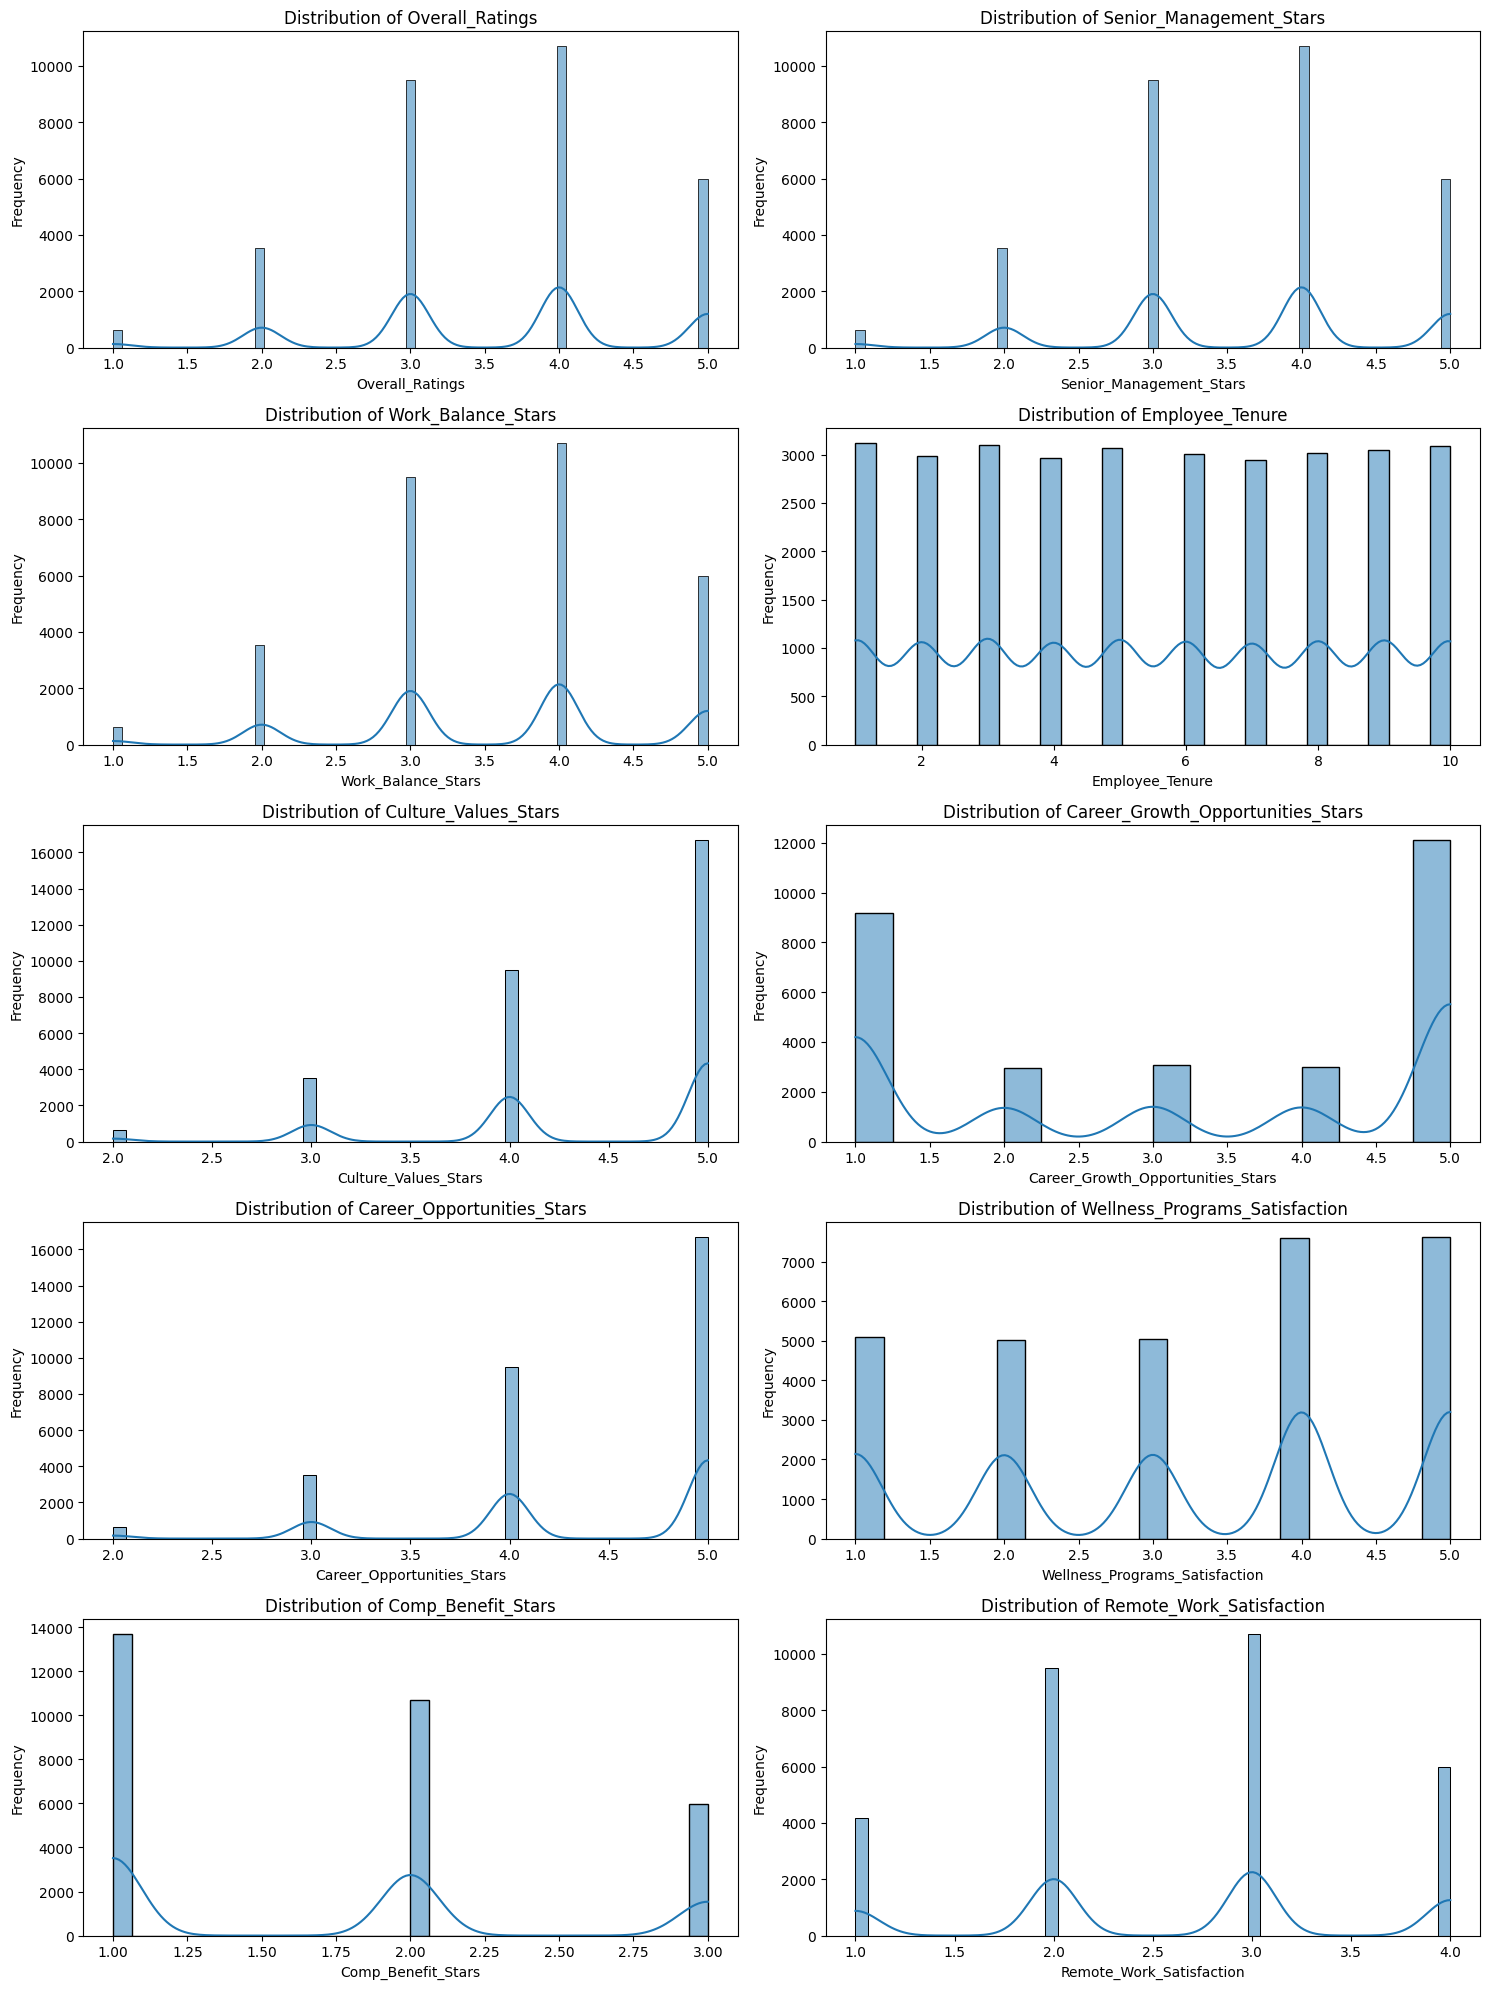

In [ ]:
# Numerical Columns
numerical_columns = [
    'Overall_Ratings', 'Work_Balance_Stars', 'Culture_Values_Stars',
    'Career_Opportunities_Stars', 'Comp_Benefit_Stars', 'Senior_Management_Stars',
    'Employee_Tenure', 'Career_Growth_Opportunities_Stars',
    'Wellness_Programs_Satisfaction', 'Remote_Work_Satisfaction'
]

# Plotting for Numerical Columns
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Loop through the first five columns and make the plot
for i, col in enumerate(numerical_columns[:5]):
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

# Loop through the last five columns and make the plot
for i, col in enumerate(numerical_columns[5:]):
    sns.histplot(df[col], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {col}')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Here's a few things to note from this plot:
- `Overall_Ratings`: The values of the employee's overall ratings are focused on 1, 2, 3, 4, and 5. However a bulk of the values fall within 3 (~`9,000`) and 4 (~`10,000`).
- `Senior_Management_Stars`: The values of the senior management ratings are distributed across 1, 2, 3, 4, and 5. Notice that a bulk of them are around 3 (~`9,000`), 4 (~`10,000`), and 5 (~`6,000`).
- `Work_Balance_Stars`: The values of the work life balance ratings are also distributed around 1, 2, 3, 4, and 5. Like the others, the majority of the values are distributed around 3 (~`9,000`), 4 (~`10,000`), and 5 (~`6,000`).
- `Employee_Tenure`: The tenure of all the employees in the company seem to be evenly distributed evenly distributed between 1 to 10 years. Each occurs at around ~`3,000` times.
- `Culture_Value_Stars`: The company culture ratings increases steadily from 2.0 to 5.0. There were no 1.0 ratings here.
- `Career_Growth_Opportunities`: Based on the visualization, the rating for the career growth opportunities are concentrated around 1.0 (~`9,000`) and 5.0 (~`12,000`). The other ratings 2.0, 3.0 and 4.0 fall within the range of `3,000` each.
- `Career_Opportunities_Stars`: The ratings for career opportinities in the organization increases steadily from 2.0 to 5.0. Like the culture values, there is als no rating of 1.0 here.
- `Wellness_Programs_Satisfaction`: The ratings within 1.0, 2.0 and 3.0 are evenly distributed around `5,000`. While the other ratings 4.0 and 5.0 are evenly distributed around ~`7,000` each.
- `Comp_Benefit_Stars`: The rating for the compensation benefits fall in the range of 1.0 to 3.0. And it decreases steadily from `14,000` (for 1.0) to `6,000` for 3.0.
- `Remote_Work_Satisfaction`: The ratings for the satisfaction on remote work ranges from 1.0 to 4.0. Which some concentration around 2.0 and 3.0.

#### 4.1.2. Univariate Analysis: Categorical Variables

We will now look at the distribution of the categorical variables in this section. These categorical variables include:
- `Employee_Engagement_Activities`,
- `Location`.

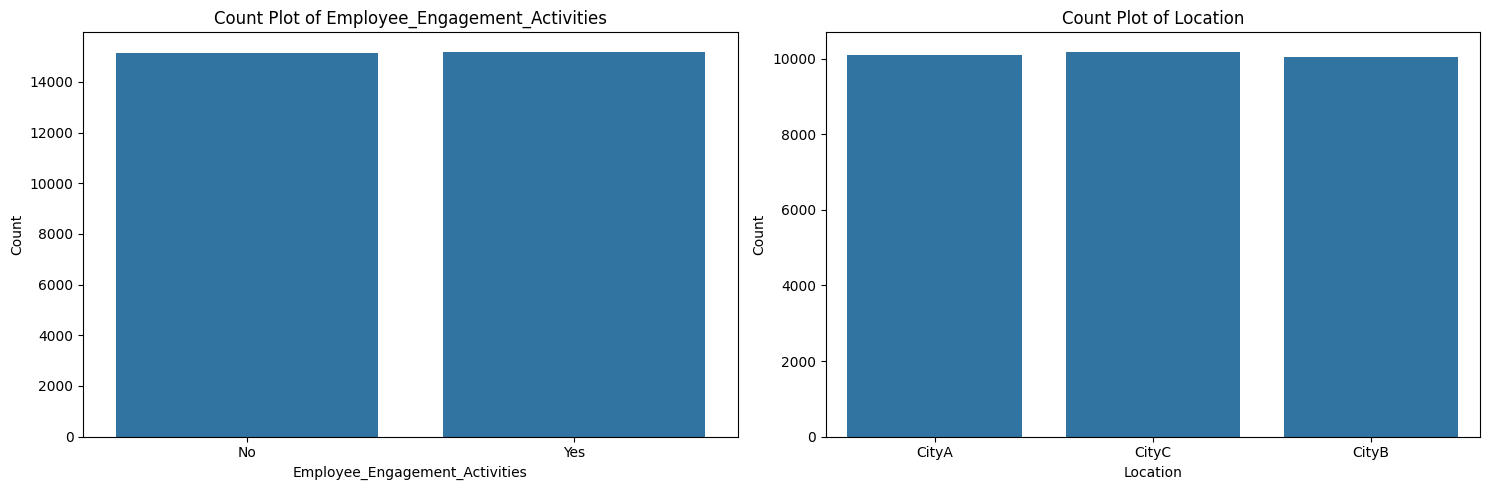

In [ ]:
# Categorical Columns
categorical_columns = ['Employee_Engagement_Activities', 'Location']

# Plotting for Categorical Columns
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))

# Loop through the columns and make the plot
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

From the plot above, we can see two things:
- `Employee_Engagement_Activities`: The number of employee feedbacks indicating they participate in engagement activities are equivalent to those that do not participate. This value floats above `14,000` for either case.
- `Location`: The location of the employees giving feedbacks seem to be evenly distributed within the three difference cities `CityA`, `CityB`, and `CityC` in the dataset.

### 4.2. Bivariate Analysis

Here, we will now go over to looking at pairs of variables/features to see how they are related to each other. We can also identify correlations if there are any, between pairs of variables/columns/features. We will approach this in three steps, by looking at:
- Pairs of Numerical Variables,
- Pairs of Categorical Variables,
- Pairs of Numerical and Categorical Variables.

#### 4.2.1. Bivariate Analysis: Pairs of Numerical Variables

We will look at the distribution of pairs of numerical variables. One of the aims of this section is to identify correlations between numerical variables, if there are any.

We will begin by making correlation plots between some of the numerical values/features in the dataset, which will only include the **ratings** in the dataset.

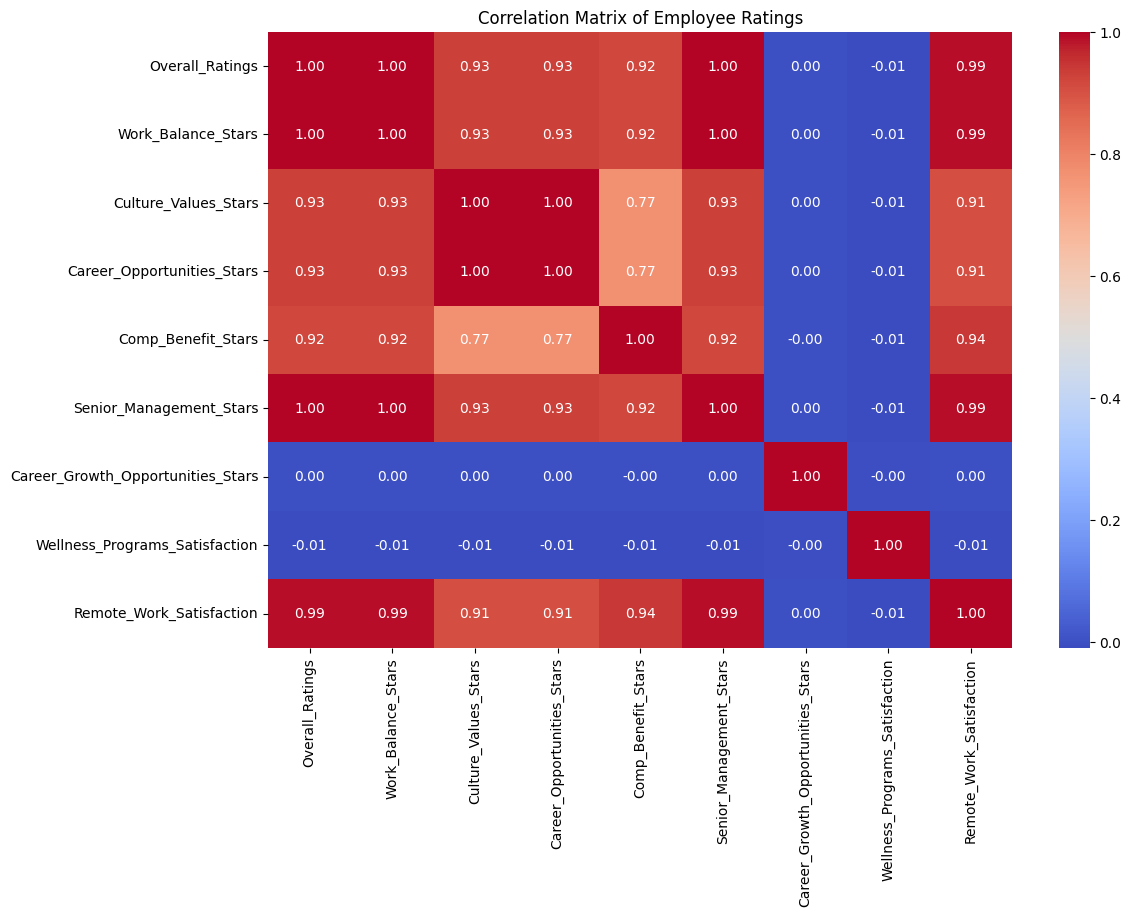

In [ ]:
# Selecting the relevant columns for the rating analysis
rating_columns = [
    'Overall_Ratings', 'Work_Balance_Stars', 'Culture_Values_Stars',
    'Career_Opportunities_Stars', 'Comp_Benefit_Stars', 'Senior_Management_Stars',
    'Career_Growth_Opportunities_Stars', 'Wellness_Programs_Satisfaction', 'Remote_Work_Satisfaction'
]

# Calculating the correlation matrix
rating_correlation = df[rating_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(rating_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Employee Ratings')
plt.show()


From the plot above, there is one very important thing to note here. There is a high degree of correlation between the the different ratings (`0.91` to `1.00`), except for `Wellness_Programs_Satisfaction` and `Career_Growth_Opportinities_Stars`. This may suggest that the general satisfaction (`Overall_Ratings`) if often aligned with specific aspects like work life balance, culture values, and career opportunities, and others.

The next thing we are goint to do now is to find relationships between the `Employee_Tenure` and the ratings in the dataset. The `Employee_Tenure` is the only numerical variable that we didn't analyze in the last plot.

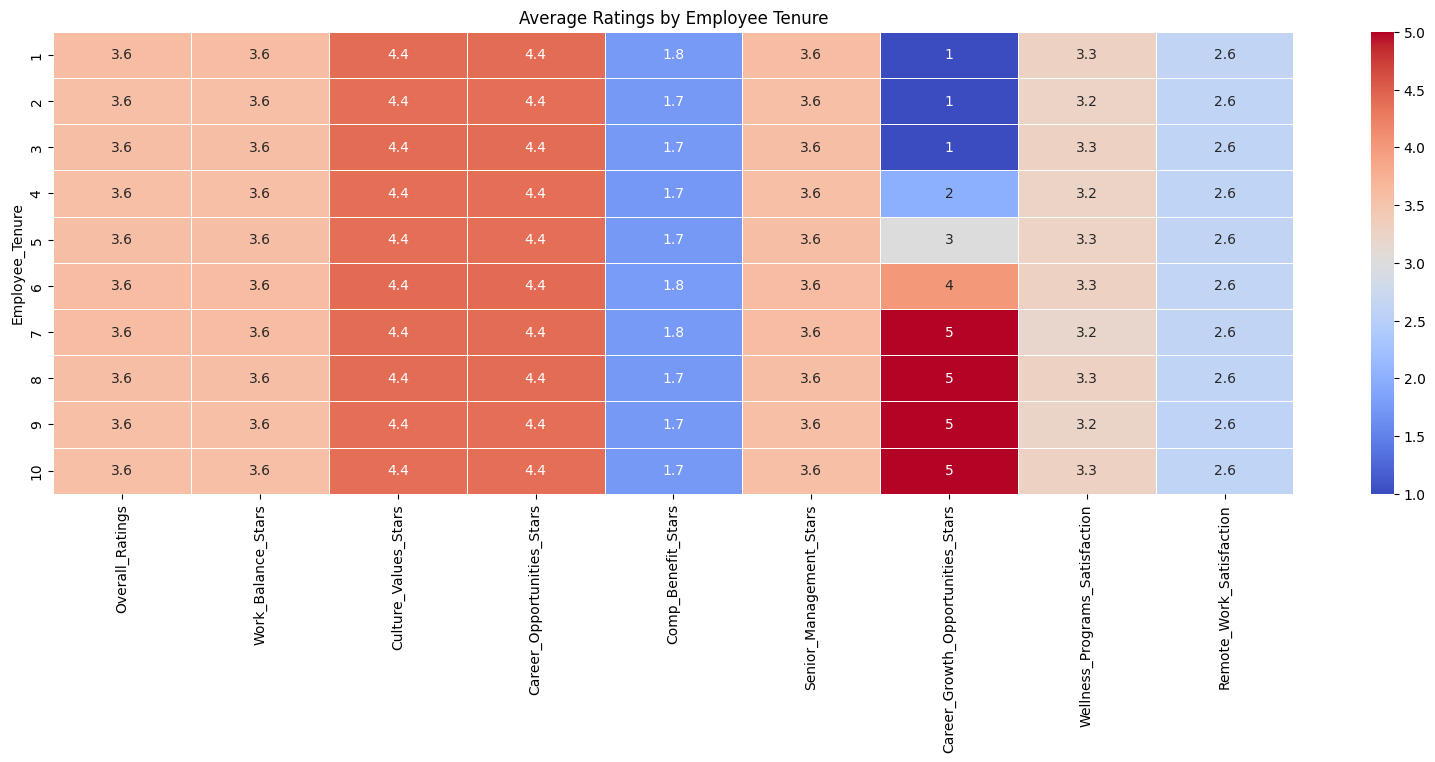

In [ ]:
# Group the dataset by Employee_Tenure and get the ratings
tenure_grouped = df.groupby('Employee_Tenure')[rating_columns].mean()

# Create figure
plt.figure(figsize=(20, 6))

# Create plot
ax = sns.heatmap(tenure_grouped, cmap='coolwarm', annot=True, linewidths=0.5)
plt.title('Average Ratings by Employee Tenure')

plt.show()

As seen above, we can observe that:
- `Overall_Ratings`, `Work_Balance_Stars` (work life balance) and `Senior_Management_Stars` all average around 3.6 for each of the employee tenures. The mean doesn't vary at all across the various employee tenures. A value of 3.6 may indicate that the employees think that the work life balance, and senior management performance are just above average (average should be around 3.0).
- `Culture_Values_Stars` and `Career_Opportunities_Stars` both average around 4.4 for each of the different employee tenures. The mean also doesn't vary at all across the various employee tenures. A value of 4.4 across all tenures, may indicate that the employees do not think that there is a lot of issues within the company culture and career opportunities.
- `Comp_Benefit_Stars` mean vary slightly from 1.7 to 1.8. This may suggest that employees with tenures of 1, 6 and 7 years like the compensation benefits of the company slightly better than the other employees whose tenure do not fall within this range. One thing that can be agreed upon in this area, is that the employees are not necessarily happy with the compensation benefits that the company provides.
- `Career_Growth_Opportunities_Stars` seems to have some pretty good correlation with `Employee_Tenure`. As seen from the plot, employees with shorter tenures tend think that there are little to no opportunities for career growth. While employees with longer tenure, tend to think that there are huge opportunities for career growth. Again, this is just a speculation.
- `Wellness_Programs_Satisfaction` mean varies slightly between 3.2 and 3.3 across the various employee tenures. This value of 3.2-3.3 is an indication that the company is doing OK in its welness programs, but there is still room for improvement.
- `Remote_Work_Satisfaction` mean falls around 2.6 for all of the employee tenures, this may indicate that the remote work environment/conditions are below average (average should be around 3.0)

#### 4.2.2. Bivariate Analysis: Pairs of Categorical Variables

We will now look at the distribution of pairs of categorical variables, which are `Employee_Engagement_Activities` and `Location`. The aim of this is to identify the distribution of these categorical values in terms of frequency.

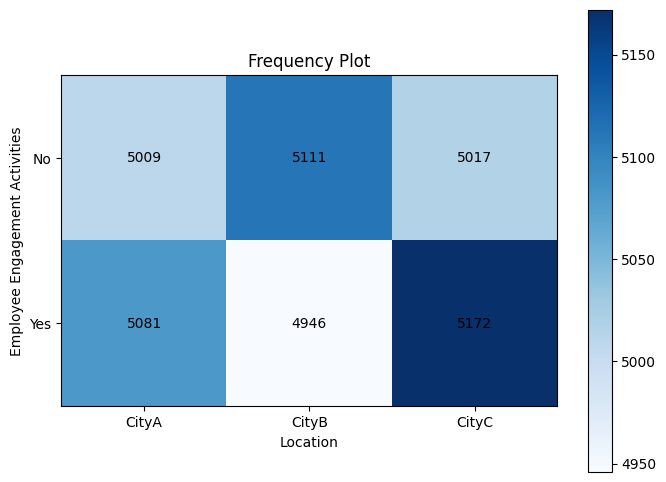

In [ ]:
# Create a cross-tabulation for 'Employee_Engagement_Activities' and 'Location'
cross_tab = pd.crosstab(df['Employee_Engagement_Activities'], df['Location'])

# Plot the cross-tabulation as a heatmap
plt.figure(figsize=(8, 6))

plt.imshow(cross_tab, cmap='Blues')
plt.title('Frequency Plot')
plt.xlabel('Location')
plt.ylabel('Employee Engagement Activities')
plt.xticks(range(len(cross_tab.columns)), cross_tab.columns)
plt.yticks(range(len(cross_tab.index)), cross_tab.index)

# Add the values inside the grids
for i in range(len(cross_tab.index)):
    for j in range(len(cross_tab.columns)):
        plt.annotate(str(cross_tab.iloc[i, j]),
                     xy=(j, i),
                     ha='center',
                     va='center')

plt.colorbar()
plt.show()


As seen from the plot above, there do not seem to be any drastic differences between employee location within the company and whether or not they participate in employee engagement activities. This speculation arises from the fact that the values here range between 4,946 and 5,172, this difference is just around 4.5% of the average value there.

#### 4.2.3. Bivariate Analysis: Pairs of Numerical and Categorical Variables

We will look at the distribution of pairs of numerical and categorical variables. One of the aims of this section is to identify correlations between numerical and categorical variables, if there are any.

Since there are only two categorical variables (`Employee_Engagement_Activities` and `Location`), this should be very easy to work through.

We will begin by looking at these two categorical variables against the ratings.

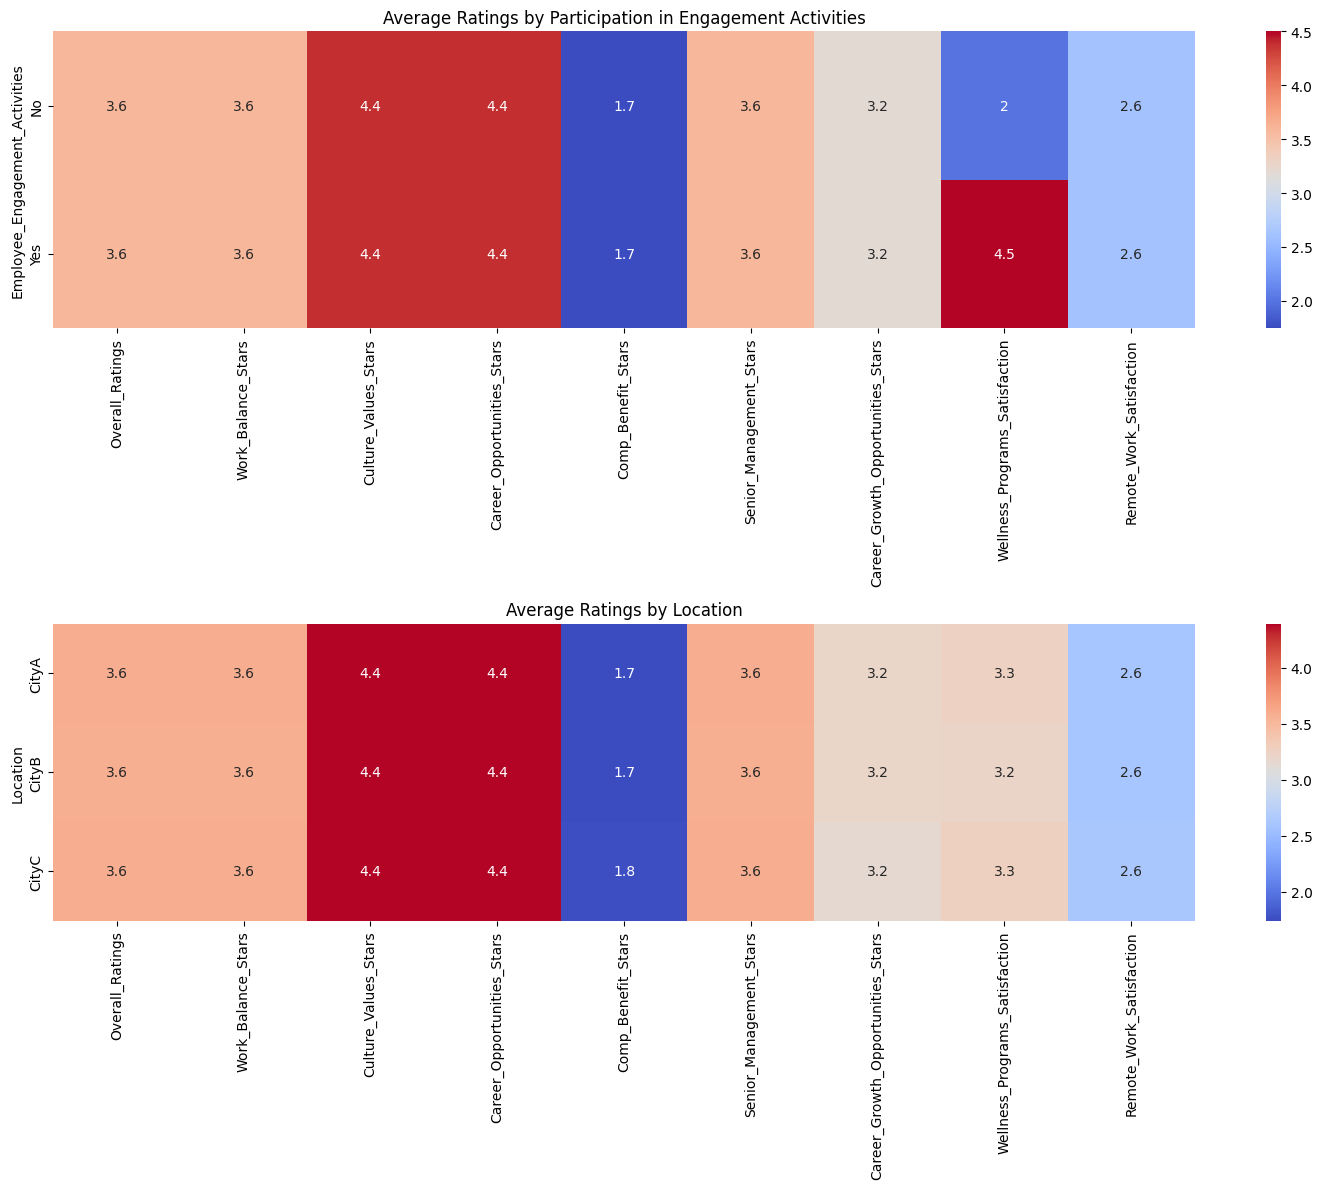

In [ ]:
# Grouping the ratings by Employee Engagement Activities
engagement_grouped = df.groupby('Employee_Engagement_Activities')[rating_columns].mean()

# Grouping the ratings by Employee Location
location_grouped = df.groupby('Location')[rating_columns].mean()

# Creating the axis
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Engagement Engagement Activities Plot
sns.heatmap(engagement_grouped, cmap='coolwarm', ax=axes[0], annot=True)
axes[0].set_title('Average Ratings by Participation in Engagement Activities')

# Location Plot
sns.heatmap(location_grouped, cmap='coolwarm', ax=axes[1], annot=True)
axes[1].set_title('Average Ratings by Location')

plt.tight_layout()
plt.show()

- **Ratings** against `Employee_Engagement_Activities`: For most ratings, there doesn't seem to be any variation across whether or not the employees participate in engagement activities. However, for `Wellness_Programs_Satisfaction`, there is some significant difference between employees that don't participate in engagement activities (2.0) and those that do (4.5). This may indicate that employees that are satisfied with the wellness programs, tend to participate in engagement activities.
- **Ratings** against `Location`: There is no difference what so variation whatsoever in the differences between the ratings and the location of the employee within the company.

The last thing we will be looking at is the relationship between both categorical variables against employee tenure. `Employee_Tenure` is the last numerical parameter that we haven't looked at.

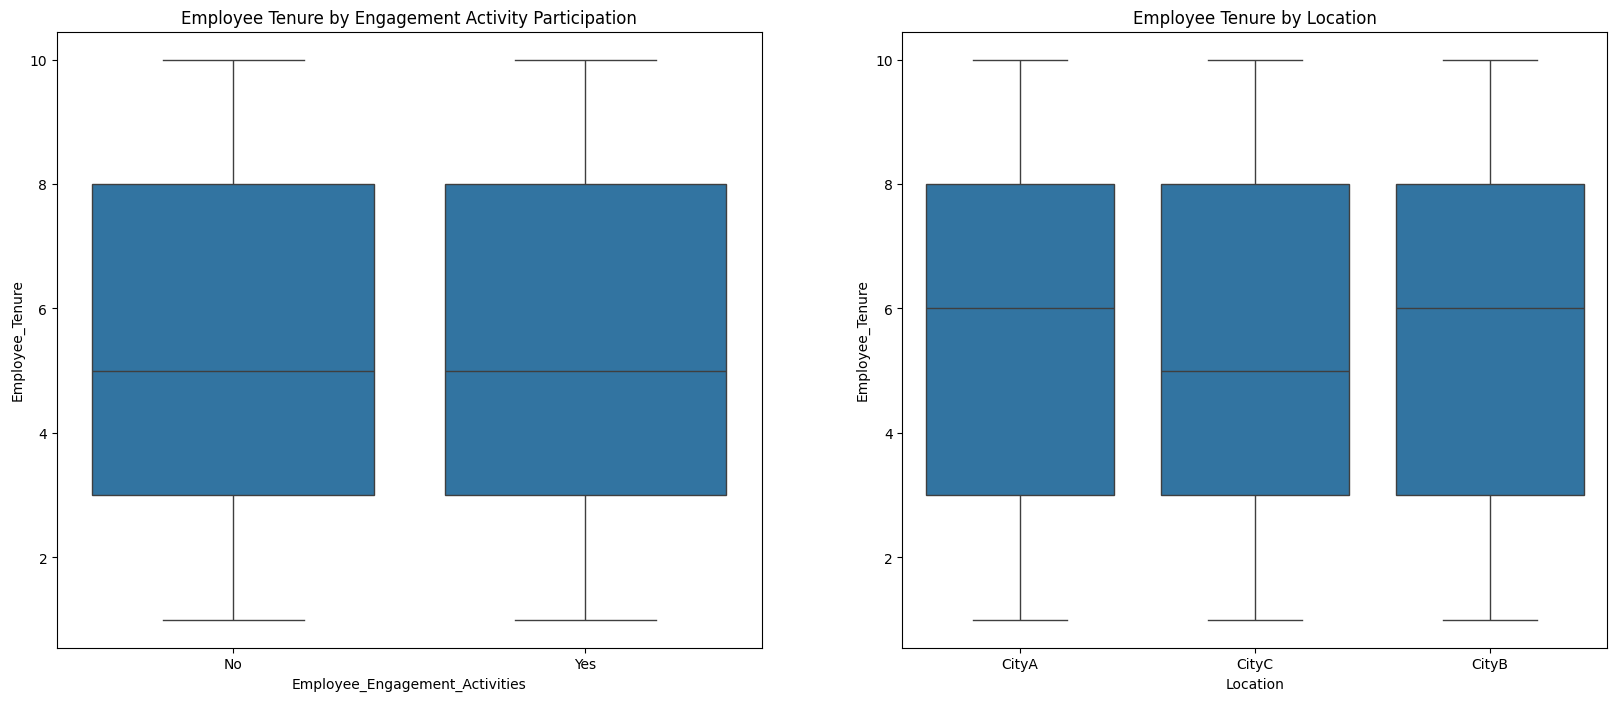

In [ ]:
# Create plot
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Employee Engagement Activities and Employee Tenure
engagement_tenure_boxplot = sns.boxplot(x='Employee_Engagement_Activities',
                                        y='Employee_Tenure',
                                        data=df,
                                        ax=ax[0])
ax[0].set_title('Employee Tenure by Engagement Activity Participation')

# Location and Employee Tenure
location_tenure_boxplot = sns.boxplot(x='Location',
                                      y='Employee_Tenure',
                                      data=df,
                                      ax=ax[1])
ax[1].set_title('Employee Tenure by Location')

plt.show()

As can be seen,
- `Employee_Engagement_Activities` against `Employee_Tenure`: The employee tenure range between 3 and 8 years in the interquatile range, with the median around 5 years. There is no significant difference between the employee tenures for `Yes`/`No` employee engagement.
- `Location` against `Employee_Tenure`: The employee tenure also range between 3 and 8 years in the interquartile range for all locations. However, there is some slight difference in the median of the employee tenures for the different locations.

### 4.3. Word Frequency Analysis

In this section, we aim to basically look at the features/columns that contain textual information/comments and identify the most common words in each of these sections. These columns include:
- `Comment_Positives`,
- `Comment_Negatives`,
- `Advice_To_Mgmt`.

Since the comments are split into three columns, this analysis will help us identify words that are synonymous with positive comments and negative comments, among other things.

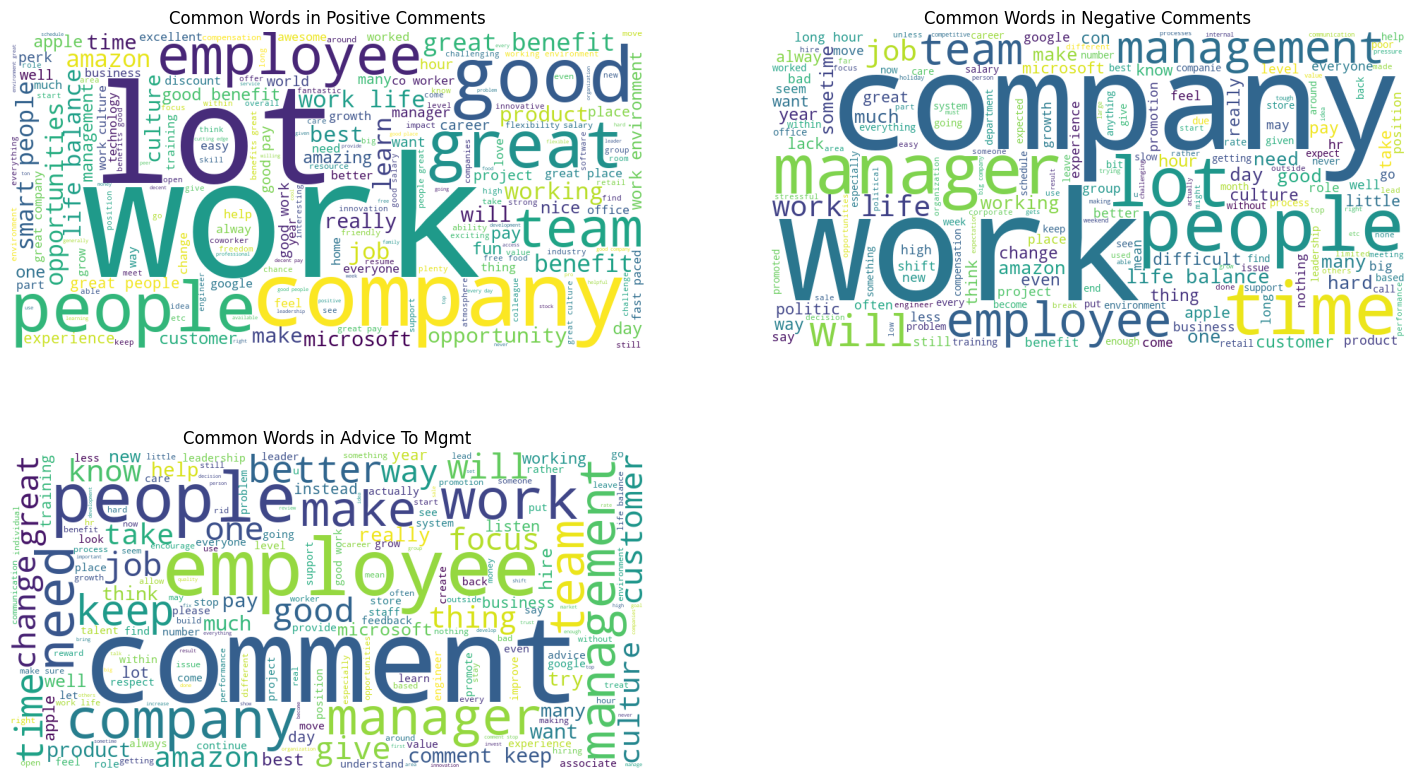

In [ ]:
# Combining each of the comments in the columns single string
positive_comments = ' '.join(df['Comment_Positives']).lower()
negative_comments = ' '.join(df['Comment_Negatives']).lower()
advice_to_mgmt = ' '.join(df['Advice_To_Mgmt']).lower()

# Initialize WordCloud
wordcloud = WordCloud(background_color="white", width=900, height=450)

# Create axis
fig, ax = plt.subplots(2, 2, figsize=(18, 10))

# Positive Comments
# Generate and plot word cloud
wordcloud.generate_from_text(positive_comments)
ax[0, 0].imshow(wordcloud)
ax[0, 0].set_title('Common Words in Positive Comments')
ax[0, 0].axis("off")

# Negative Comments
# Generate and plot word cloud
wordcloud.generate_from_text(negative_comments)
ax[0, 1].imshow(wordcloud)
ax[0, 1].set_title('Common Words in Negative Comments')
ax[0, 1].axis("off")

# Advice to Mgmt
# Generate and plot word cloud
wordcloud.generate_from_text(advice_to_mgmt)
ax[1, 0].imshow(wordcloud)
ax[1, 0].set_title('Common Words in Advice To Mgmt')
ax[1, 0].axis("off")

# Remove unused axis
ax[1, 1].remove()

# See the plots
plt.show()


A few things to note from this visualization, although this visual doesn't really say much, we can as well infer a few things from it.
- **Word Cloud** of `Comment_Positives`: Since, this section is for positive comments, from the plot we can see that 'work', 'opportunity', 'life balance', 'team', 'culture', 'benefit', are som eof the common words here. From these, we can speculate that a lot of employees like the job, the opportunities it brings, the work life balance, their respective teams, the work culture, and perhaps the benefits that come with the job. Again these are just speculations.
- **Word Cloud** of `Negative_Comments`: Again, since this seiction is for negative comments, we can also see from the plot that 'difficult', 'politic', 'management', 'team', 'pay', 'salary' are part of the most common words. We can speculate that some of the most common problems the employees have, are issues with the politics of the work place, management, their teams, and even the pay/salary. This is still a speculation.
- **Word Cloud** of `Advice_To_Mgmt`: Here, we also see that 'manager', 'respect', 'performance', 'listen', 'reward' are some of the most common words here. We can also speculate that some/a lot of employees would like 'respect' around the environment to be improved, for management to listen better, reward performance, and so on. This right here, is still a speculation.

### 4.4. Temporal Analysis

In this section, we will be looking at the ratings with time. We want to see if there are changes in the ratings over time, or if there are patterns in the ratings given over time.

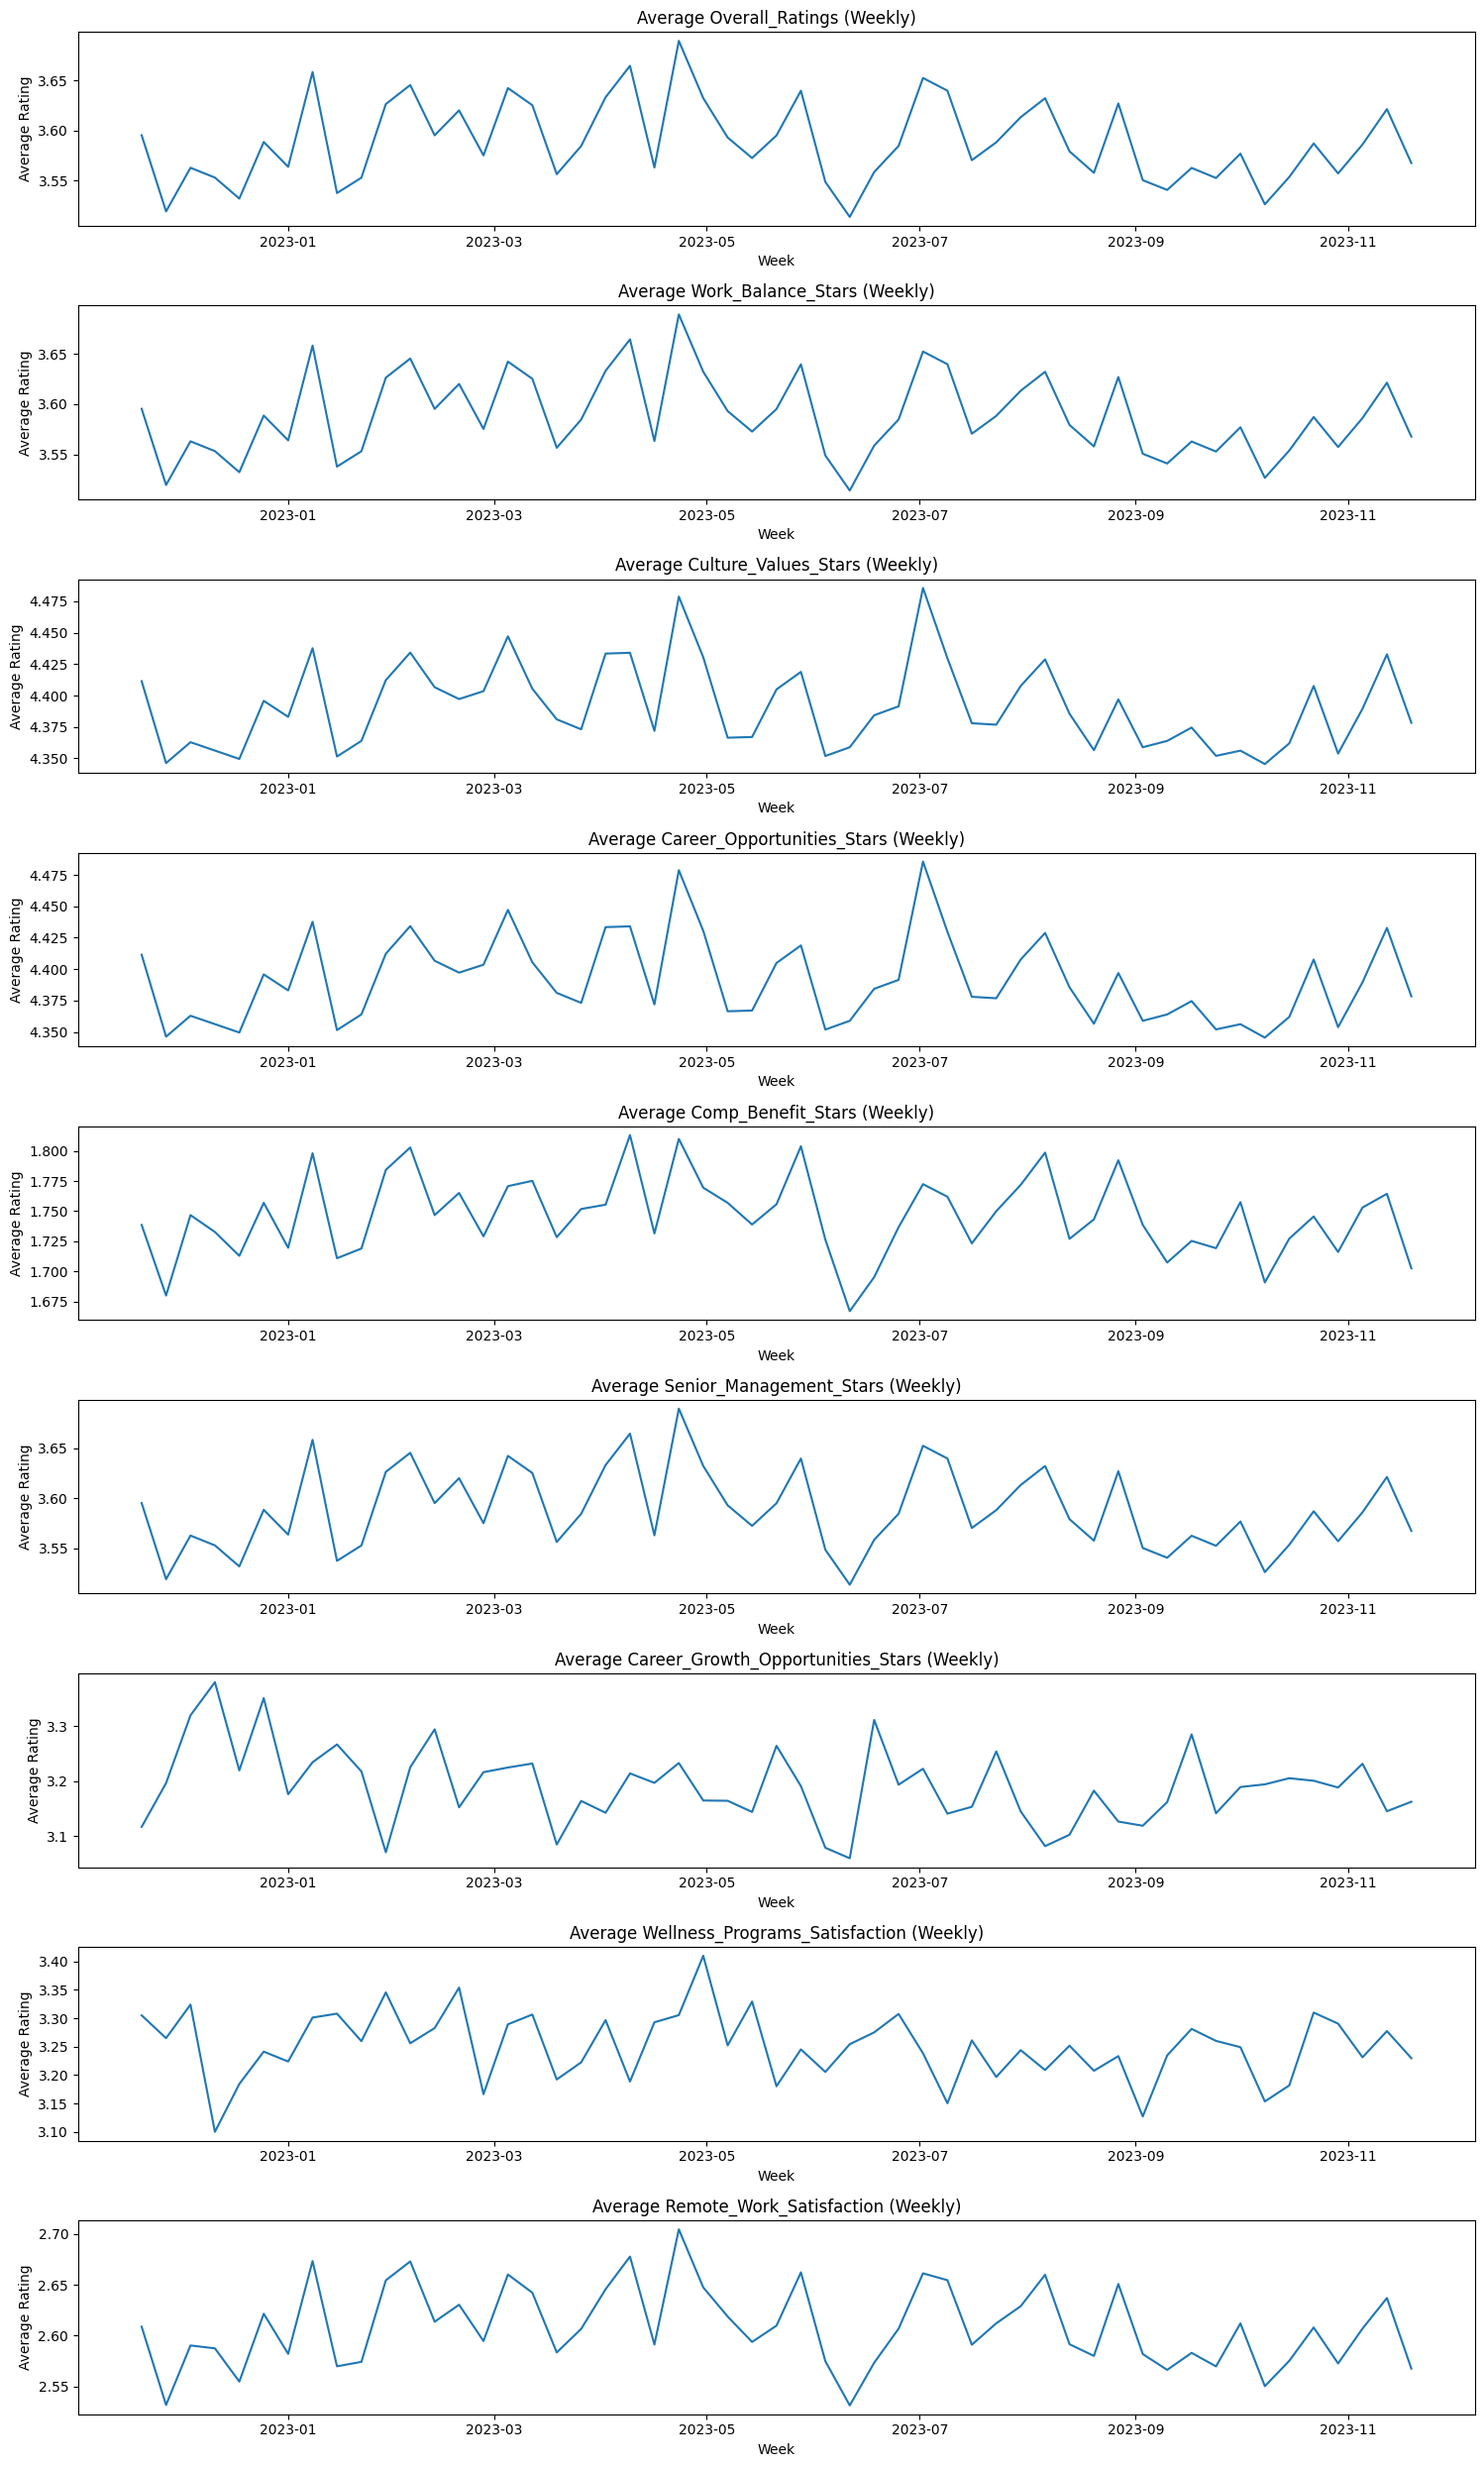

In [ ]:
# Convert Feedback_Date to datetime format so that we can use it for grouping
df['Feedback_Date'] = pd.to_datetime(df['Feedback_Date'])

# Copy the data, set 'Feedback_Date' as index and group into weeks
df_cp = df.copy()
df_cp.set_index('Feedback_Date', inplace=True)
weekly_data = df_cp.resample('W').mean(numeric_only=True)

# Create plots
fig, ax = plt.subplots(len(rating_columns), 1, figsize=(15, 25))

for i in range(len(rating_columns)):
    column = rating_columns[i]
    ax[i].plot(weekly_data.index, weekly_data[column])
    ax[i].set_title(f'Average {column} (Weekly)')
    ax[i].set_xlabel('Week')
    ax[i].set_ylabel('Average Rating')

plt.tight_layout()
plt.show()

As seen above, there doesn't seem to be any indication that there are significant changes in each of the ratings over time.

## 5. Conclusion

From the analysis and everything we have done, we now have to come to a conclusion.
- There is a high level of correlation between **Wellness Programs** and the **Employee Engagement**. Employees who were better satisfied with the company's wellness programs, participated more in employee engagement activities than the others who were not satisfied with the wellness programs.
- Employees in `CityA` and `CityC` have a slightly higher participation in employee activities, than the employees in other locations.
- The number of years that the employees have spent in the organization does not really correlate/relate with the whether or not they are interested in employee engagement activities. This means, there is no indication that employees will become more engaging with time.

## 6. Recommendations

From the conclusions above, a few things can be recommended.
- The company should improve on it's wellness programs. If there is some sort of variation in the way the wellness programs are being run, either at a departmental level, tenure level, or seniority level, they need to look at the areas where it is better, and improve on it. This is because, this data indicated that this has a direct correlation with the level of participation in employee engagement activities.
- The company should also try to look at the what they are doing slightly better for the employees at `CityA` and `CityC`, and try to replicate it for employees in `CityB`. This is because the number of employees that participate in employee engagement activities are slightly higher than those in `CityB`.
- As it relates to the employee tenure, there is no indication that the number of years the employee has spent with the company is directly related to the level of participation they have for the engagement activities. So, it may not be productive for the company to focus its effort to retain employees for longer because they think it may improve employee engagement. - On another note, from the analysis done, there is some correlation between employee tenure and carreer growth opportunities. This indicates that employees who stayed longer with the company, may have done so because they believed there were good opportunities for career growth. If one considers the cost of rehiring and retraining new employees when other employees resign, it is usually best to work on ensuring that employee attrition is reduced to the barest minimum. One way to ensuring this is to always ensure that employees do not feel like there is no room for career growth.
- The ratings for compensation benefits from this dataset, all fell in the range of 1.0 to 3.0. This is quite poor, in fact it Compensation Benefits had the poorest rating in all. The company could do something about this if they can. Although there was no indication that this had significant employee attrition, it may improve the motivation of the employees.